# Machine Learning Online Class - Exercise 4 Neural Network Learning




In [1]:
# Initialization
from ex4func import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as scio
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 9.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2


In [2]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10;         # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)


## Part 1: Loading and Visualizing Data
We start the exercise by first loading and visualizing the dataset.
You will be working with a dataset that contains handwritten digits.



Loading and Visualizing Data ...



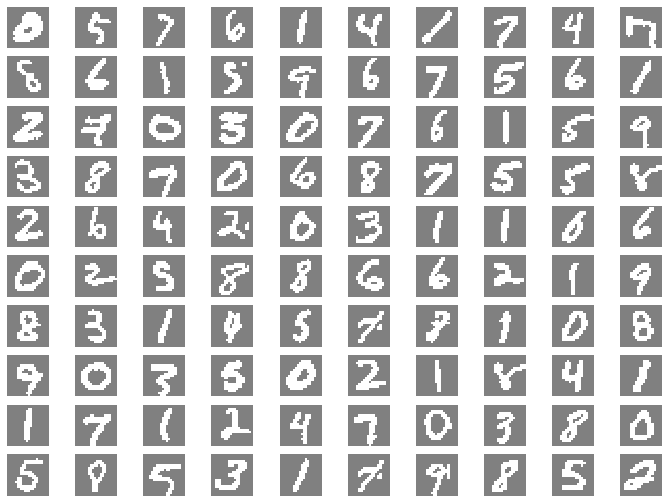

In [3]:
# Load Training Data
print('Loading and Visualizing Data ...\n')
data = scio.loadmat('ex4data1.mat')
X,y=data['X'],data['y'][:,0]

displayData(X)


## Part 2: Loading Pameters
In this part of the exercise, we load some pre-initialized
neural network parameters.

In [4]:
print('\nLoading Saved Neural Network Parameters ...\n')
# Load the weights into variables Theta1 and Theta2
weights_data = scio.loadmat('ex4weights.mat')
theta1,theta2=weights_data['Theta1'],weights_data['Theta2']
nn_params = np.append(theta1,theta2)




Loading Saved Neural Network Parameters ...



## Part 3: Compute Cost (Feedforward)
To the neural network, you should first start by implementing the
feedforward part of the neural network that returns the cost only. You
should complete the code in nnCostFunction.m to return cost. After
implementing the feedforward to compute the cost, you can verify that
your implementation is correct by verifying that you get the same cost
as us for the fixed debugging parameters.

We suggest implementing the feedforward cost *without* regularization
first so that it will be easier for you to debug. Later, in part 4, you
will get to implement the regularized cost.


In [5]:
print('\nFeedforward Using Neural Network ...\n')
# Weight regularization parameter (we set this to 0 here).
lamb = 0
J,_ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,num_labels, X, y, lamb)
print('Cost at parameters (loaded from ex4weights): %f \n (this value should be about 0.287629) \n' % J)


Feedforward Using Neural Network ...

Cost at parameters (loaded from ex4weights): 0.287629 
 (this value should be about 0.287629) 



## Part 4: Implement Regularization
Once your cost function implementation is correct, you should now
continue to implement the regularization with the cost.

In [6]:
print('\nChecking Cost Function (w/ Regularization) ... \n')

# Weight regularization parameter (we set this to 1 here).
lamb = 1

J,_ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,num_labels, X, y, lamb)
print('Cost at parameters (loaded from ex4weights): %f\n(this value should be about 0.383770)\n' % J)


Checking Cost Function (w/ Regularization) ... 

Cost at parameters (loaded from ex4weights): 0.383770
(this value should be about 0.383770)



## Part 5: Sigmoid Gradient
Before you start implementing the neural network, you will first
implement the gradient for the sigmoid function. You should complete the
code in the sigmoidGradient file.

In [7]:
print('\nEvaluating sigmoid gradient...\n')

g = sigmoidGradient(np.array([-1,-0.5,0,0.5,1]))
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:\n  ')
print(g)
print('\n\n')



Evaluating sigmoid gradient...

Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]





## Part 6: Initializing Pameters
In this part of the exercise, you will be starting to implment a two
layer neural network that classifies digits. You will start by
implementing a function to initialize the weights of the neural network


In [8]:
print('\nInitializing Neural Network Parameters ...\n')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.append(initial_Theta1,initial_Theta2)


Initializing Neural Network Parameters ...



## Part 7: Implement Backpropagation
Once your cost matches up with ours, you should proceed to implement the
backpropagation algorithm for the neural network. You should add to the
code you've written in nnCostFunction.m to return the partial
derivatives of the parameters.

In [9]:
print('\nChecking Backpropagation... \n')

#  Check gradients by running checkNNGradients
checkNNGradients()



Checking Backpropagation... 

The above two columns you get should be very similar.
 (Left-Your Numerical Gradient, Right-Analytical Gradient)


If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 2.242585558337555e-11 



## Part 8: Implement Regularization
Once your backpropagation implementation is correct, you should now
continue to implement the regularization with the cost and gradient.

In [10]:
print('\nChecking Backpropagation (w/ Regularization) ... \n')

# Check gradients by running checkNNGradients
lamb = 3
checkNNGradients(lamb)

# Also output the costFunction debugging values
debug_J,_  = nnCostFunction(nn_params, input_layer_size,hidden_layer_size, num_labels, X, y, lamb)

print('\n\nCost at (fixed) debugging parameters (w/ lambda = {}): {} '
         '\n(for lambda = 3, this value should be about 0.576051)\n\n'.format(lamb,debug_J))




Checking Backpropagation (w/ Regularization) ... 

The above two columns you get should be very similar.
 (Left-Your Numerical Gradient, Right-Analytical Gradient)


If your backpropagation implementation is correct, then 
the relative difference will be small (less than 1e-9). 

Relative Difference: 2.1689070074933065e-11 



Cost at (fixed) debugging parameters (w/ lambda = 3): 0.5760512469501329 
(for lambda = 3, this value should be about 0.576051)




## Part 8: Training NN
You have now implemented all the code necessary to train a neural
network. To train your neural network, we will now use "fmincg", which
is a function which works similarly to "fminunc". Recall that these
advanced optimizers are able to train our cost functions efficiently as
long as we provide them with the gradient computations.

In [11]:
print('\nTraining Neural Network... \n')

lamb=1

all_theta=training(X,y,input_layer_size,hidden_layer_size, num_labels,lamb)

Theta1 = np.reshape(all_theta[0:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))
Theta2 = np.reshape(all_theta[hidden_layer_size * (input_layer_size + 1):],
                        (num_labels, (hidden_layer_size + 1)))


Training Neural Network... 

     fun: 0.34523407546341955
     jac: array([ 2.83919242e-05,  1.23060747e-06, -5.59232251e-07, ...,
        7.65189860e-05,  1.69734774e-04, -3.17505557e-05])
 message: 'Max. number of function evaluations reached'
    nfev: 251
     nit: 23
  status: 3
 success: False
       x: array([ 0.24904362,  0.00615304, -0.00279616, ...,  1.97476374,
        1.34518226, -1.34156605])


## Part 9: Visualize Weights
You can now "visualize" what the neural network is learning by
displaying the hidden units to see what features they are capturing in
the data.


Visualizing Neural Network... 



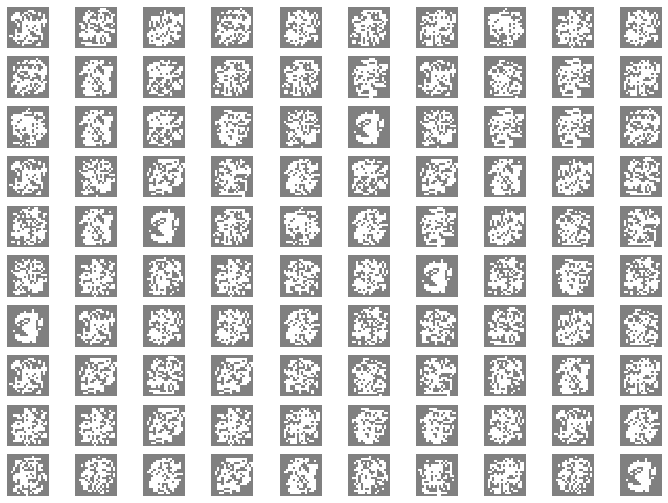

In [12]:
print('\nVisualizing Neural Network... \n')

displayData(Theta1[:, 1:])



## Part 10: Implement Predict
After training the neural network, we would like to use it to predict
the labels. You will now implement the "predict" function to use the
neural network to predict the labels of the training set. This lets
you compute the training set accuracy.

In [13]:
pred = predict(Theta1, Theta2, X)
print('\nTraining Set Accuracy: %f\n' % (np.mean(pred==y)*100,) )


Training Set Accuracy: 99.180000

